In [1]:
#If using a jupyter notebook in the rdkit environment,
#make sure to conda install notebook within the environment. 

import PIL #needed for IPythonConsole

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole #needed to show molecules 
from rdkit.Chem import Draw
from rdkit.Chem import Recap,BRICS
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions #Only needed if modifying defaults

In [3]:
#Use SVG graphics
IPythonConsole.ipython_useSVG=True

### Substructure Searching

Usually, substructure matching is done by using query molecules built from either the SMARTS or SMILES:

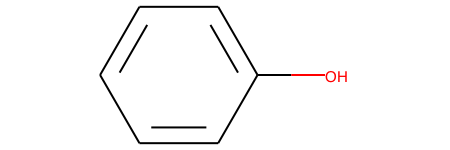

In [4]:
#create an example molecule
m = Chem.MolFromSmiles('c1ccccc1O')
m

In [10]:
#First define the pattern that we will search a molecule for
patt = Chem.MolFromSmarts('ccO')

In [11]:
#Determine if molecule has that substructure 
m.HasSubstructMatch(patt)

True

In [13]:
#Get the atoms indices of m that match the pattern (ordered same way as Patt)
m.GetSubstructMatch(patt)

(0, 5, 6)

In [14]:
#To get all matches regardless of ordering
m.GetSubstructMatches(patt)

((0, 5, 6), (4, 5, 6))

We can also look for molecules that match a pattern in a list of molecules:

In [15]:
# molecules from the 2014 TDT challenge (Courtesy of Greg Landrum)
data = [('SJ000241686-1', 'Cc1ccccc1c2nsc(SCC(=O)Nc3ccc(F)cc3F)n2'),
 ('SJ000241766-1', 'O=C(Nc1nc(cs1)c2ccccn2)c3ccc(cc3)S(=O)(=O)N(CCC#N)CCC#N'),
 ('SJ000241694-1', 'Cc1ccccc1c2nsc(SCC(=O)Nc3ccccc3C(F)(F)F)n2'),
 ('SJ000241774-1', 'COc1cc2ccccc2cc1C(=O)\\N=C\\3/Sc4cc(Cl)ccc4N3C'),
 ('SJ000241702-1', 'CC(=O)c1ccc(NC(=O)CSc2nc(ns2)c3ccccc3C)cc1'),
 ('SJ000241785-1', 'CC1=CC=CN2C(=O)C(=C(Nc3ccc(cc3)[N+](=O)[O-])N=C12)C=O'),
 ('SJ000241710-1', 'Fc1ccccc1NC(=O)CSc2nc(ns2)c3ccccc3Cl'),
 ('SJ000241792-1', 'NC(=O)c1c2CCCCc2sc1NC(=O)\\C(=C/c3ccc(Cl)cc3)\\C#N'),
 ('SJ000241718-1', 'COc1cccc(NC(=O)CSc2nc(ns2)c3ccccc3Cl)c1'),
 ('SJ000241800-1',
  'NC(=O)c1c2CCCCc2sc1NC(=O)\\C(=C\\c3ccc(cc3)[N+](=O)[O-])\\C#N'),
 ('SJ000241726-1', 'FC(F)(F)c1ccc(NC(=O)CSc2nc(ns2)c3ccccc3Cl)cc1'),
 ('SJ000241808-1', 'COc1ccc(\\C=C(\\C#N)/C(=O)Nc2cccc(c2)C(F)(F)F)cc1OC')]

mols = [Chem.MolFromSmiles(y) for x,y in data]
labels = [x for x,y in data]

In [16]:
#Use cyano group as substructure
patt = Chem.MolFromSmiles('C#N')

In [18]:
#Create a list of all molecules in mols that have this substructure
matches = [m for m in mols if m.HasSubstructMatch(patt)]
len(matches)

4

In [ ]:
#I can't figure out how to display these as a grid with highlights

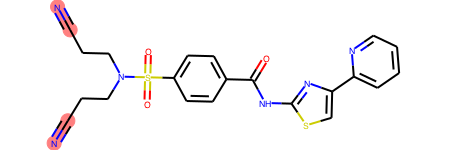

In [32]:
matches[0].GetSubstructMatches(Chem.MolFromSmiles('C#N'))
matches[0]

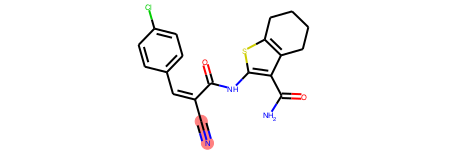

In [33]:
matches[1].GetSubstructMatches(Chem.MolFromSmiles('C#N'))
matches[1]

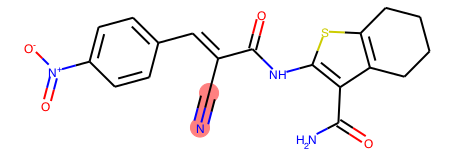

In [34]:
matches[2].GetSubstructMatches(Chem.MolFromSmiles('C#N'))
matches[2]

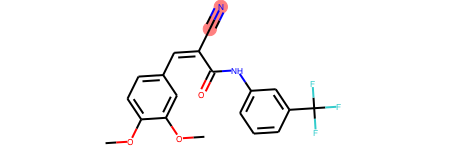

In [35]:
matches[3].GetSubstructMatches(Chem.MolFromSmiles('C#N'))
matches[3]

Note, one can also do stereochemistry specific substructure matching using the *useChirality* argument. See the RDKit documentation for more details.

### Chemical Transformations

These methods are for simple transformations. For more complex transformations, see the Chemical Reactions functionality. 

#### Substructure-based transformations

One can easily delete substructures from a molecule:

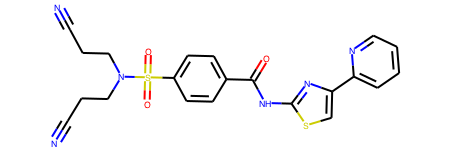

In [41]:
m = Chem.MolFromSmiles('O=C(Nc1nc(cs1)c2ccccn2)c3ccc(cc3)S(=O)(=O)N(CCC#N)CCC#N')
m

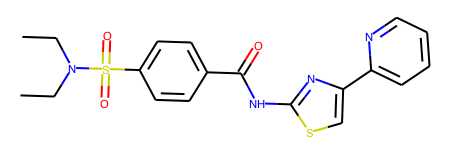

In [42]:
#delete based on cyano substructure
patt = Chem.MolFromSmarts('C#N')

rm = AllChem.DeleteSubstructs(m,patt)
rm

In [43]:
#print out the SMILES code of the modified molecule
Chem.MolToSmiles(rm)

'CCN(CC)S(=O)(=O)c1ccc(cc1)C(=O)Nc1nc(cs1)-c1ccccn1'

One can also replace substructures:

In [50]:
patt = Chem.MolFromSmarts('C#N') #pattern to replace
repl = Chem.MolFromSmiles('C(=O)O') #what to replace it with

rep_m = AllChem.ReplaceSubstructs(m,patt,repl)

This procedure produces to different structures:

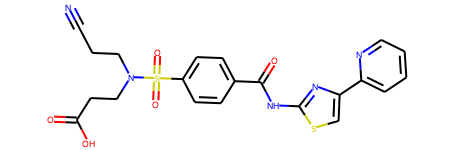

In [51]:
rep_m[0]

In [52]:
Chem.MolToSmiles(rep_m[0])

'N#CCCN(CCC(=O)O)S(=O)(=O)c1ccc(cc1)C(=O)Nc1nc(cs1)-c1ccccn1'

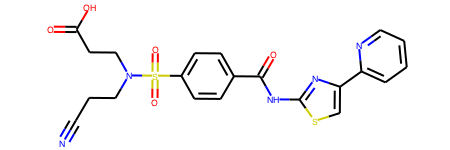

In [53]:
rep_m[1]

In [54]:
Chem.MolToSmiles(rep_m[1])

'N#CCCN(CCC(=O)O)S(=O)(=O)c1ccc(cc1)C(=O)Nc1nc(cs1)-c1ccccn1'

It is also possible to remove the side chains from the core:

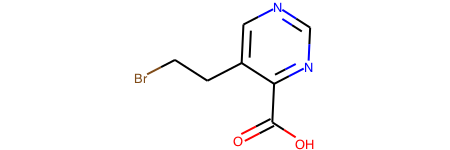

In [55]:
m1 = Chem.MolFromSmiles('BrCCc1cncnc1C(=O)O')
m1

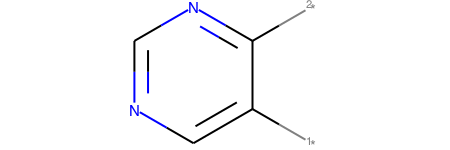

In [57]:
core = Chem.MolFromSmiles('c1cncnc1')
tmp = Chem.ReplaceSidechains(m1,core)
tmp

In [58]:
Chem.MolToSmiles(tmp)

'[*]c1cncnc1[*]'

One can also remove the core:

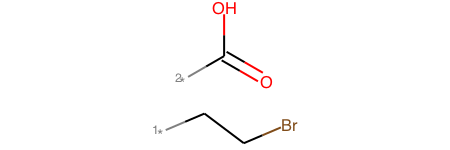

In [60]:
side_chains = Chem.ReplaceCore(m1,core)
side_chains

In [61]:
Chem.MolToSmiles(side_chains)

'[*]C(=O)O.[*]CCBr'

As of now, these side chains are a single molecule. But we can break them apart into fragments:

In [62]:
sc = Chem.GetMolFrags(side_chains,asMols=True)
len(sc)

2

In [64]:
print(Chem.MolToSmiles(sc[0],True)) #True allows for isomeric labeling

print(Chem.MolToSmiles(sc[1],True))

[1*]CCBr
[2*]C(=O)O


### Murcko Decomposition

The Murcko Decomposition allows one to turn a molecule into a scaffold

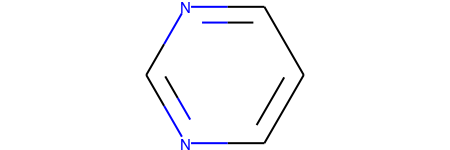

In [70]:
from rdkit.Chem.Scaffolds import MurckoScaffold

#using m1 from above
core = MurckoScaffold.GetScaffoldForMol(m1)
core

In [71]:
Chem.MolToSmiles(core)

'c1cncnc1'

One can also turn the scaffold into a generic framework

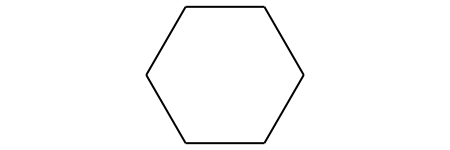

In [74]:
fw = MurckoScaffold.MakeScaffoldGeneric(core)
fw

RDKit also allows for determination of the Maximum Common Substructure (MCS) of two or more molecules using the FindMCS function. Seem the documentation for further details. 